<h1><center>End To End Data Analysis Project </h1>
    <h2> <center>Olympics Analysis 1896 - 2016 </h2>
    

### Importing Necessary Library

In [1]:
import numpy as np
import pandas as pd

### Data Ingestion

In [2]:
df=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')

In [3]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df.shape

(271116, 15)

In [ ]:
### Concentrating on Summer Olympics

In [6]:
df=df[df['Season']=="Summer"]

In [7]:
df.shape

(222552, 15)

In [8]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
122558,61949,Koh Hock Seng,M,23.0,168.0,66.0,Malaysia,MAS,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,NaN
7262,4059,"Georges Ivan ""Go"" Andr (Monnard-)",M,34.0,188.0,85.0,France,FRA,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 400 metres Hurdles,NaN
165043,82877,Camille-Marie Manuella Muffat,F,18.0,183.0,71.0,France,FRA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 200 metres Individual Medley,NaN
226146,113664,Lorenz Spann,M,27.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Gymnastics,Gymnastics Men's Individual All-Around,NaN
98173,49685,Valeriy Volodymyrovych Honcharov,M,26.0,168.0,57.0,Ukraine,UKR,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN


In [9]:
region_df.tail(2)

,NOC,region,notes
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


### Merging Region Dataset to main Dataset

In [10]:
df=df.merge(region_df,on='NOC',how='left')

In [11]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
20503,12898,Virginie Bojaryn,F,17.0,172.0,62.0,France,FRA,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 200 metres Breaststroke,NaN,France,NaN
84878,51898,Christian Iloanusi,M,18.0,178.0,90.0,Nigeria,NGR,1988 Summer,1988,Summer,Seoul,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",NaN,Nigeria,NaN
174939,106794,Michel Scheuer,M,29.0,NaN,NaN,Germany,GER,1956 Summer,1956,Summer,Melbourne,Canoeing,"Canoeing Men's Kayak Singles, 10,000 metres",Bronze,Germany,NaN
201069,122632,Hermann Tunner,M,35.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Discus Throw,NaN,Austria,NaN
190296,116301,Aleksandr Nikolayevich Sukhorukov,M,28.0,196.0,93.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,NaN,Russia,NaN


In [181]:
### Getting Medal Count on Region Basis

In [182]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [183]:
df['region'].unique().shape

(206,)

### Checking Null Values

In [184]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [16]:
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


### Concatemation with Original Dataframe

In [17]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [18]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN,0,0,0


In [192]:
df.groupby('NOC').sum()[['Gold',"Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13128\2634446244.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [193]:
df[(df['NOC']=='IND') & (df['Medal']=="Gold")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


## Removing Duplicated Rows

In [24]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [25]:
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [26]:
medal_tally=medal_tally.groupby('NOC').sum()[['Gold',"Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\3551878163.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medal_tally=medal_tally.groupby('NOC').sum()[['Gold',"Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()


In [27]:
medal_tally

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [28]:
medal_tally[medal_tally['NOC']=="IND"]

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


### Taking Year and Country name for drop down column 

In [199]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [29]:
years=df['Year'].unique().tolist()

In [30]:
years.sort()

In [31]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [32]:
years.insert(0,"Overall")

In [33]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [34]:
country=np.unique(df['region'].dropna().values).tolist()

In [35]:
country.sort()

In [36]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [37]:
country.insert(0,'Overall')

## Part 1

### Getting Medal Tally (when we click drop down button on year and country)

In [40]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [41]:
def fetch_medal_tally(year,country):
    flag=0
    if year=="overall" and country == 'overall':
        temp_df = medal_df
        
    if year=="overall" and country != 'overall':
        flag=1
        temp_df = medal_df[medal_df['region']== country ]
        
    if year!="overall" and country == 'overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    
    if year!="overall" and country != 'overall':
        temp_df = medal_df[(medal_df['Year']==int(year)) & (medal_df['region'] == country)]
        
        
    if flag == 1:    
        x = temp_df.groupby('Year').sum()[['Gold',"Silver","Bronze"]].sort_values('Year',ascending=True).reset_index()
    else:
        x = temp_df.groupby('Year').sum()[['Gold',"Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()
        
    x['total'] = x['Gold']+ x['Silver']+ x['Bronze']
    
    print(x)

In [44]:
fetch_medal_tally(year="overall",country="India")

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\709502748.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = temp_df.groupby('Year').sum()[['Gold',"Silver","Bronze"]].sort_values('Year',ascending=True).reset_index()


In [45]:
medal_df[medal_df['region']=="India"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
436,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,0,0,0
437,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,0,0,0
790,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
791,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,0,0,0
792,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0
216985,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,India,NaN,0,0,0
218411,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN,0,0,0
222416,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0


In [46]:
medal_df[medal_df['Year'] == 2016]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
34,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN,0,0,0
77,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN,0,0,0
78,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN,0,0,0
79,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,NaN,0,0,0
80,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222327,135410,Zaidatul Husniah Zulkifli,F,22.0,156.0,40.0,Malaysia,MAS,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Malaysia,NaN,0,0,0
222346,135421,Goretti Alejandra Zumaya Flores,F,19.0,165.0,65.0,Mexico,MEX,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Women's Air Rifle, 10 metres",NaN,Mexico,NaN,0,0,0
222383,135453,Kelita Zupancic,F,26.0,169.0,70.0,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,Canada,NaN,0,0,0
222407,135478,Henrikas ustautas,M,22.0,192.0,96.0,Lithuania,LTU,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Canadian Singles, 200 metres",NaN,Lithuania,NaN,0,0,0


In [214]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year=="overall" and country == 'overall':
        temp_df = medal_df
        
    if year=="overall" and country != 'overall':
        flag=1
        temp_df = medal_df[medal_df['region']== country ]
        
    if year!="overall" and country == 'overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    
    if year!="overall" and country != 'overall':
        temp_df = medal_df[(medal_df['Year']==int(year)) & (medal_df['region'] == country)]
        
        
    if flag == 1:    
        x = temp_df.groupby('Year').sum()[['Gold',"Silver","Bronze"]].sort_values('Year',ascending=True).reset_index()
    else:
        x = temp_df.groupby('Year').sum()[['Gold',"Silver","Bronze"]].sort_values('Gold',ascending=False).reset_index()
        
    x['total'] = x['Gold']+ x['Silver']+ x['Bronze']
    
    print(x)

In [215]:
fetch_medal_tally(df,2016,"USA")

   Year  Gold  Silver  Bronze  total
0  2016    46      37      38    121


C:\Users\DELL\AppData\Local\Temp\ipykernel_13128\534793625.py:21: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## Part 2 

## Overall Analysis
    1.No. of editions
    2.No. of cities
    3.No. of events/sports
    4.No. of athletes
    5.Participating Nation

In [47]:
df.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0


In [48]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [49]:
df['Year'].unique().shape

(29,)

In [50]:
df['Year'].unique().shape[0]-1

28

In [51]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [52]:
df['City'].unique().shape

(23,)

In [53]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [54]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [55]:
df['Event'].unique().shape

(651,)

In [56]:
df['Name'].unique().shape

(116122,)

In [57]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [58]:
df['region'].unique().shape

(206,)

### Plotiing Graph

In [59]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [60]:
df['region']

0               China
1               China
2             Denmark
3             Denmark
4         Netherlands
             ...     
222547      Argentina
222548            USA
222549         Russia
222550         Russia
222551        Belarus
Name: region, Length: 221167, dtype: object

In [68]:
df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [69]:
nation_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
#nation_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().sort_values().reset_index()

In [70]:
nation_over_time

,index,Year
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [71]:
nation_over_time.rename(columns={'index':'Edition','Year':'No of Countries'},inplace=True)

In [72]:
nation_over_time

,Edition,No of Countries
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [73]:
import plotly.express as px

In [76]:
fig=px.line(nation_over_time,x="Edition",y="No of Countries")

In [77]:
fig.show()

### Over the years , How many events it happend in Olympics

In [79]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [78]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

### Over the years, How many Atheletes Participated

In [80]:
df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')

,index,Year
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024
22,1912,2409
21,1920,2675
19,1924,3256
20,1928,3246
24,1932,1922


### Over The years want to know on each sports how many event has been happend

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
x=df.drop_duplicates(['Year', 'Sport', 'Event'])

<Axes: xlabel='Year', ylabel='Sport'>

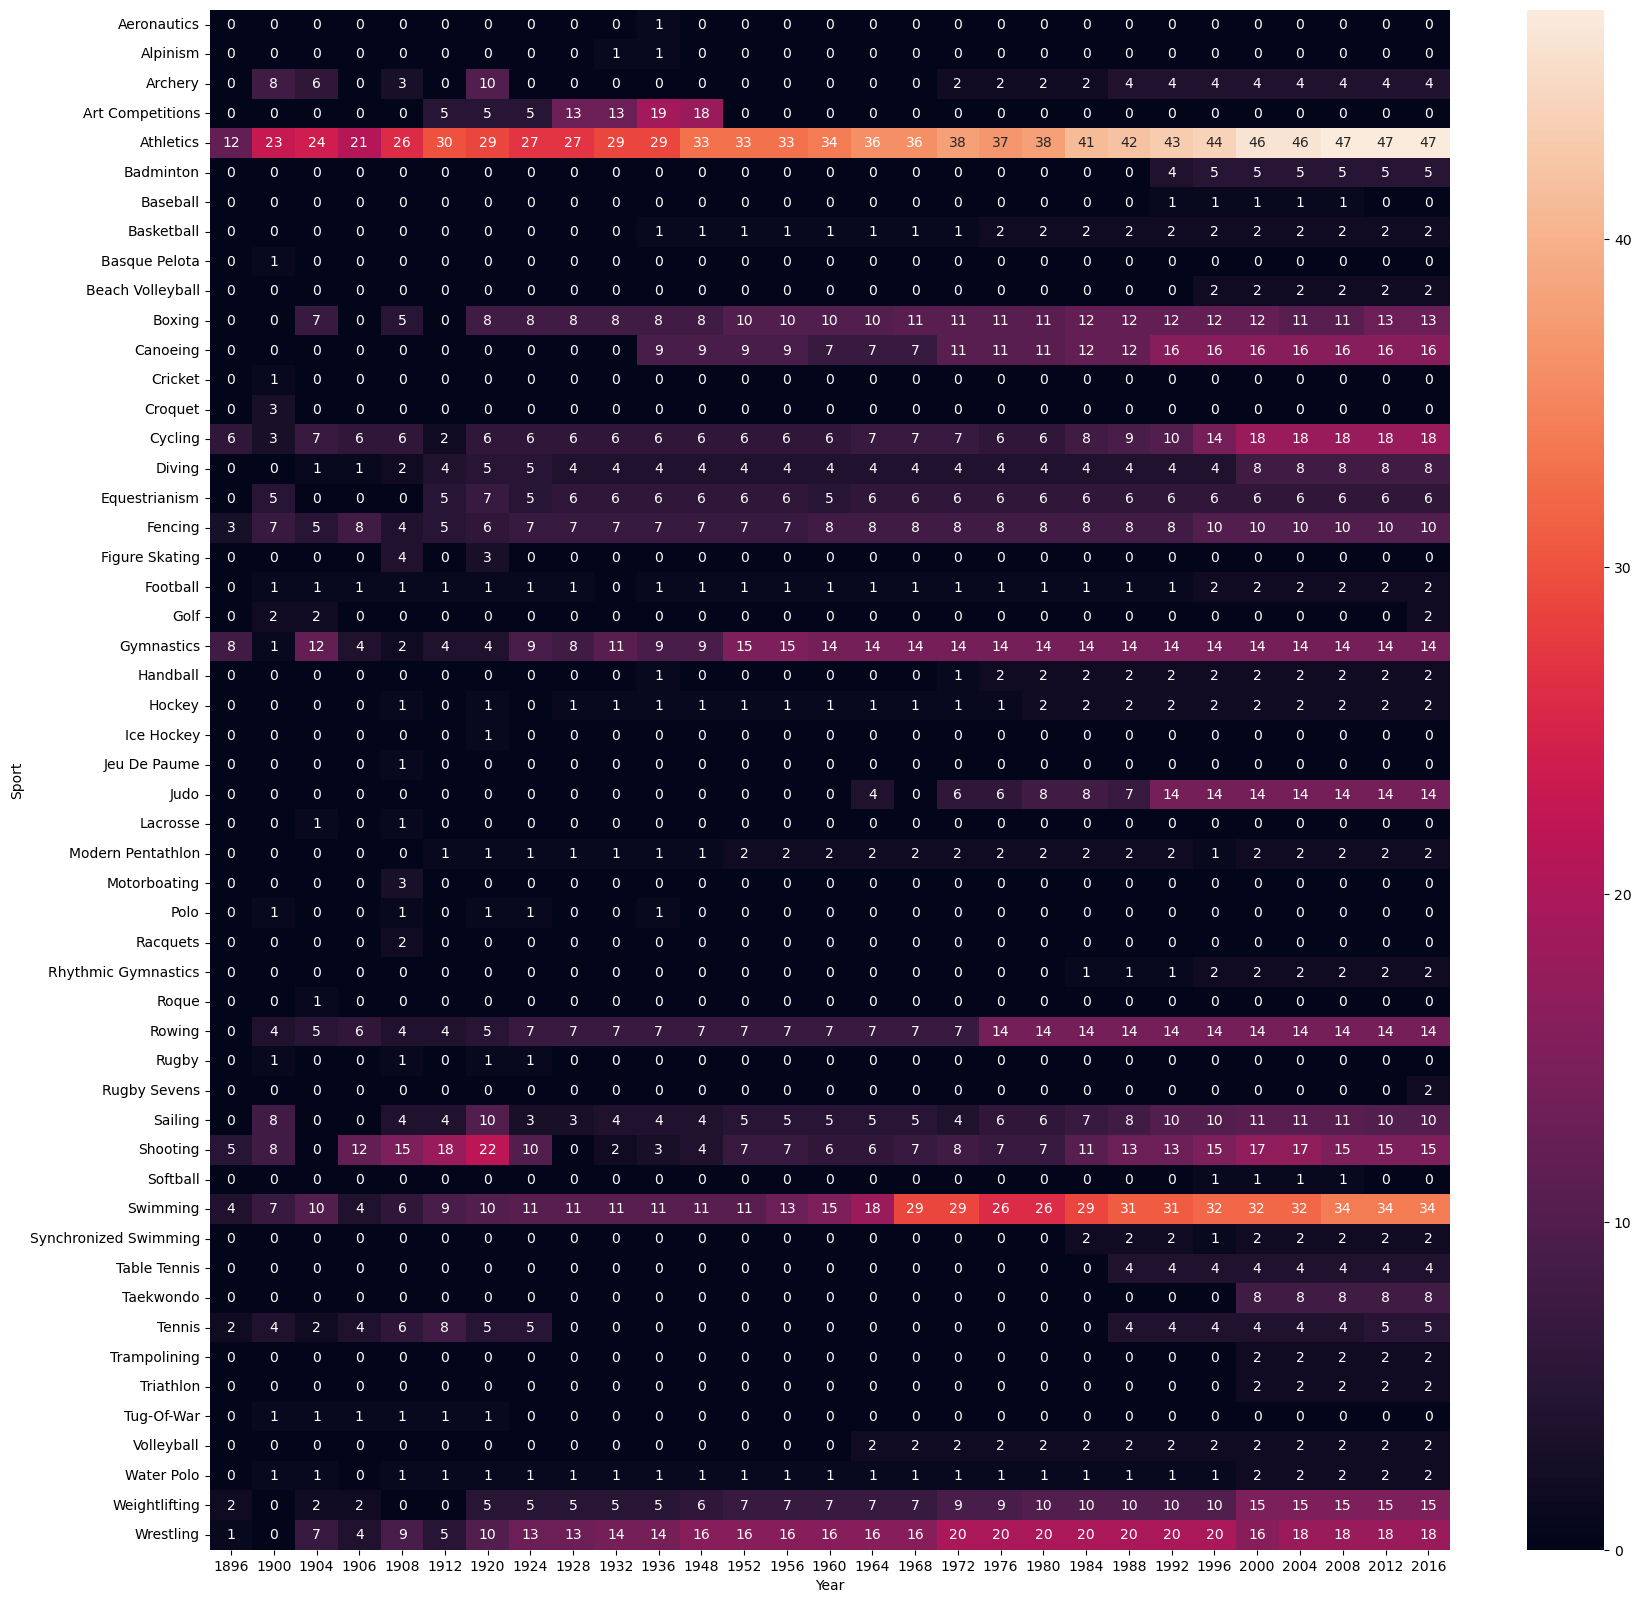

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

### Most sucessfull Atheletes

In [93]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [120]:
def most_sucessful(df,sport):
    temp_df=df.dropna(subset=["Medal"])  ### Droping rows which is containing nan values 
    
    if sport != "Overall":
        temp_df=temp_df[temp_df['Sport']== sport]
        
    return temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on="Name",how="left")[['index','Name_x',"Sport","region"]].drop_duplicates(subset=['index'])
    

In [128]:
temp_df=df.dropna(subset=["Medal"])

In [133]:
temp_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0


In [131]:
temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on="Name",how="left")[['index','Name_x',"Sport","region"]].drop_duplicates(subset=['index'])


,index,Name_x,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


In [121]:
most_sucessful(df,"Gymnastics")

,index,Name_x,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary
193,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia


## Part 3
## Country Wise Analysis
    Country Wise Medally Tally per year
    What countries are good at heat map
    Most Sucessfull Atheletes Top 10

In [140]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [144]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event',"Medal"],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\2496695302.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [151]:
new_df=temp_df[temp_df['region'] == 'USA']
final_df=new_df.groupby('Year').count()['Medal'].reset_index()

In [152]:
fig=px.line(final_df,x="Year",y="Medal")
fig.show()

### Which Country are good at which sports

In [159]:
temp_df=df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event',"Medal"],inplace=True)
new_df=temp_df[temp_df['region'] == 'China']
fig_df=new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\2942339974.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year', ylabel='Sport'>

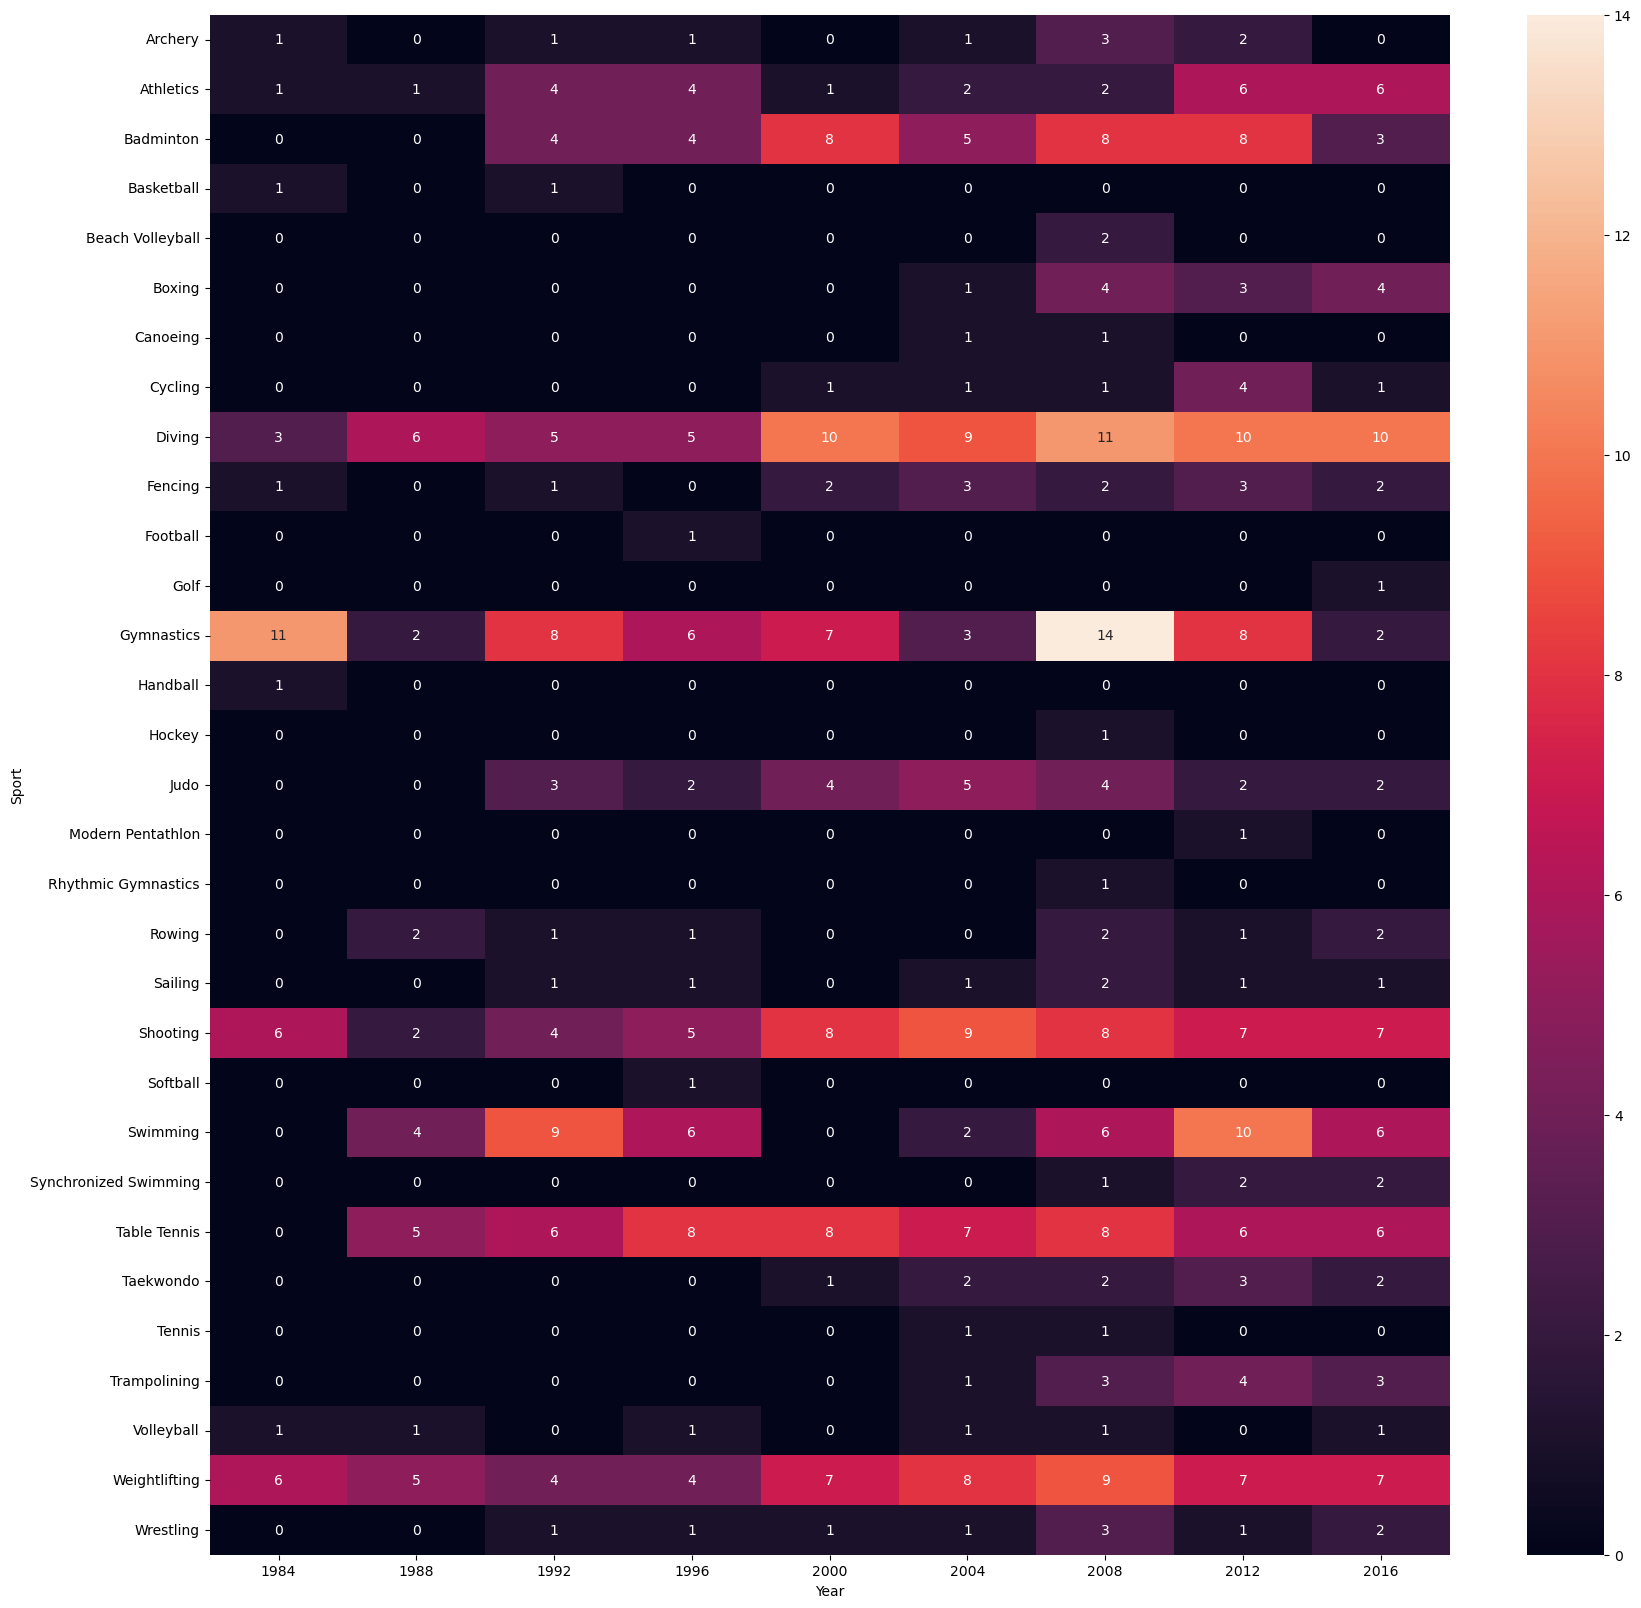

In [160]:
plt.figure(figsize=(20,20),)
sns.heatmap(fig_df,annot=True)

### Trying Most sucessfull atheletes

In [161]:
def most_sucessful_athelets(df,country):
    temp_df=df.dropna(subset=['Medal'])
    
    temp_df[temp_df['region']== country ]
    
    x=temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on="Name",how="left")[['index','Name_x',"Sport"]].drop_duplicates(subset=['index'])
    return x

In [163]:
most_sucessful_athelets(df,"India")

,index,Name_x,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics
49,Nikolay Yefimovich Andrianov,15,Gymnastics
73,Borys Anfiyanovych Shakhlin,13,Gymnastics
97,Takashi Ono,13,Gymnastics
130,Edoardo Mangiarotti,13,Fencing
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
157,Aleksey Yuryevich Nemov,12,Gymnastics
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
195,Birgit Fischer-Schmidt,12,Canoeing


## Part 4
## Athelete Wise Analysis

In [165]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


### Age Distribution with respect to medals

In [166]:
import plotly.figure_factory as ff

In [168]:
ath_df=df.drop_duplicates(subset=['Name','region'])

In [180]:
x1=ath_df['Age'].dropna()
x2=ath_df[ath_df['Medal'] == "Gold"]['Age'].dropna()
x3=ath_df[ath_df['Medal'] == "Silver"]['Age'].dropna()
x4=ath_df[ath_df['Medal'] == "Bronze"]['Age'].dropna()

In [181]:
fig=ff.create_distplot([x1,x2,x3,x4],['Overall Age',"Gold Medalists","Silver Medalists","Bronze Medalists"],show_hist=False,show_rug=False)
fig.show()

### Lets check the distribution with respect to sports

#### Distribution of age with respect to medal(Gold) on different sports

In [188]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [195]:
X=[]
name=[]
for sports in famous_sports:
    temp_df=athlete_df[athlete_df['Sport']==sports ]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sports)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\889006941.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\889006941.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\889006941.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\889006941.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6908\889006941.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Us

In [197]:
name

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Polo',
 'Ice Hockey']

#### Height vs Weight with respect to Games

In [183]:
athlete_df=df.drop_duplicates(subset=['Name', 'region'])
athlete_df['Medal'].fillna('No Medal', inplace=True)

In [184]:
def weight_v_height(df,sport):
    athlete_df = df.drop_duplicates(subset=['Name', 'region'])
    athlete_df['Medal'].fillna('No Medal', inplace=True)
    if sport != 'Overall':
        temp_df = athlete_df[athlete_df['Sport'] == sport]
        return temp_df
    else:
        return athlete_df

In [187]:
weight_v_height(df,"Basketball")

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN,0,0,0
105,69,Tamara Abalde Daz,F,19.0,185.0,72.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,No Medal,Spain,NaN,0,0,0
187,124,Youssef Mohamed Abbas,M,31.0,NaN,NaN,Egypt,EGY,1952 Summer,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,No Medal,Egypt,NaN,0,0,0
200,136,Alessandro Abbio,M,29.0,195.0,85.0,Italy,ITA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,No Medal,Italy,NaN,0,0,0
277,192,Ahmed El-Sayed Abdel Hamid Mobarak,M,25.0,189.0,85.0,Egypt,EGY,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,No Medal,Egypt,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222257,135369,Dino Zucchi,M,24.0,192.0,NaN,Italy,ITA,1952 Summer,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,No Medal,Italy,NaN,0,0,0
222304,135401,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze,Lithuania,NaN,1,0,0
222307,135402,Mindaugas ukauskas,M,20.0,201.0,100.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze,Lithuania,NaN,1,0,0
222502,135530,Philip Zwiener,M,23.0,202.0,98.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,No Medal,Germany,NaN,0,0,0


## Men vs Women Participation Over Years

In [ ]:
def men_vs_women(df):
    athlete_df = df.drop_duplicates(subset=['Name', 'region'])

    men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
    women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

    final = men.merge(women, on='Year', how='left')
    final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

    final.fillna(0, inplace=True)

    return final

In [198]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

In [199]:
athlete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222544,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN,1,0,0
222546,135565,Fernando scar Zylberberg,M,23.0,168.0,76.0,Argentina,ARG,2000 Summer,2000,Summer,Sydney,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [201]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()

In [202]:
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [203]:
final = men.merge(women, on='Year', how='left')

In [204]:
final

,Year,Name_x,Name_y
0,1896,174,NaN
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0


In [205]:
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

In [206]:
final

,Year,Male,Female
0,1896,174,NaN
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0


In [207]:
final.fillna(0, inplace=True)

In [208]:
final

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0
